# Lab 3 Template

**Author:** [YOUR NAME]

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice Monte Carlo integration methods and implement the Ising model. We'll explore how statistical methods can be used to solve complex physical problems numerically.

## Key Concepts
- Monte Carlo integration -- rejection method
- Statistical sampling and uncertainty
- Ising model and phase transitions
- Metropolis algorithm -- probability condition


## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
# TODO: Import numpy, matplotlib.pyplot, and any other necessary libraries
# Set numpy random seed for reproducibility

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(25)

# Part I: Sphere in 3D Monte Carlo Integration

We will use Monte Carlo methods to calculate the mass of a sphere with different density distributions. The basic idea is to:
1. Generate random points in a cube that encloses the sphere
2. Check which points fall inside the sphere
3. Use these points to estimate integrals

## Part A: Uniform Density (3 pt)

For a sphere of radius 1 with uniform density ρ = 2.0, calculate the mass using Monte Carlo integration.

**Monte Carlo Integration Theory:**

Monte Carlo integration is a powerful numerical technique that uses random sampling to estimate integrals. For a 3D sphere problem, we:

1. **Enclosing Volume**: Use a cube from [-1,1]³ (volume = 8) that contains the unit sphere
2. **Random Sampling**: Generate N random points uniformly distributed in this cube
3. **Hit-or-Miss**: Check which points fall inside the sphere (x² + y² + z² < 1)
4. **Integration Formula**: Estimate the integral using:
   $$\text{Mass} = V_{cube} \times \frac{1}{N} \sum_{i=1}^{N} \rho(x_i, y_i, z_i) \times I(x_i, y_i, z_i)$$
   where I(x,y,z) = 1 if point is inside sphere, 0 otherwise

**Statistical Uncertainty:**
- Standard error decreases as σ ∝ 1/√N (slow convergence!)
- Uncertainty estimate: σ ≈ np.sqrt(p * (1 - p) / N) * cube_volume * density, where p is fraction of acceptance.
- For uniform distribution in [-1,1]: np.sqrt(p * (1 - p)) = √((1-(-1))²/12) = √(1/3) ≈ 0.577
check if it's true.


In [2]:
# TODO: Step 1 - Generate random points function
# Use np.random.uniform(-1.0, 1.0, N) for each coordinate
def generate_random_points(N):
    points = np.random.uniform(-1.0, 1.0, size=(N, 3)) # this gives N numbers of numpy.ndarray of size 3, each elem for x, y, z
    return points
    
# TODO: Step 2 - Index function for sphere  
# Check condition: x² + y² + z² < 1
def index_func(pos):
    dist = 0
    for x in pos:
        dist += x ** 2 # distance from origin
    if dist < 1:
        return 1 # point in the sphere
    else:
        return 0 # point outside sphere
    
# TODO: Step 3 - Uniform density function
# Return constant density = 2.0 for all points
def uniform_density_func(pos):
    return 2.0

# TODO: Step 4 - Mass calculation with uncertainty
# Apply Monte Carlo formula: V_cube/N * sum(density * inside)
# Calculate uncertainty: V_cube * 0.577 / sqrt(N)
def calculate_mass_and_uncertainty(pos_arr):
    N = len(pos_arr) # pos_arr already generated with N rows
    V_cube = 8.0 # [-1, 1]^3
    # mass calc
    f = np.array([(uniform_density_func(p) * index_func(p)) for p in pos_arr])
    mass = V_cube / N * np.sum(f)
    unc = V_cube * np.std(f, ddof=1) / np.sqrt(N) # V_cube * (sigma / sqrt N)
    # unc = V_cube * 0.577 / np.sqrt(N) # theoretical?

    return mass, unc
    
    
# TODO: Test with N=100 and print results
N = 100
points = generate_random_points(N)
mass_100, uncertainty_100 = calculate_mass_and_uncertainty(points)
# theoretical value
theoretical = (4.0/3.0) * np.pi * 2.0

print(f'Mass estimate (N=100): {mass_100:.3f} ± {uncertainty_100:.3f}')
print(f'Theoretical value: {theoretical:.3f}')
print(f'Relative error: {abs(mass_100 - theoretical)/theoretical * 100:.1f}%')

Mass estimate (N=100): 8.320 ± 0.803
Theoretical value: 8.378
Relative error: 0.7%


In [3]:
# define helper function that doees step 1 thru 4 for a given N
def integrate_MC(N):
    ps = generate_random_points(N)
    return calculate_mass_and_uncertainty(ps)

**Convergence Analysis:**

Study how Monte Carlo estimates improve with more samples (N).

**Key Concepts:**
- Error decreases as 1/√N (slow convergence)

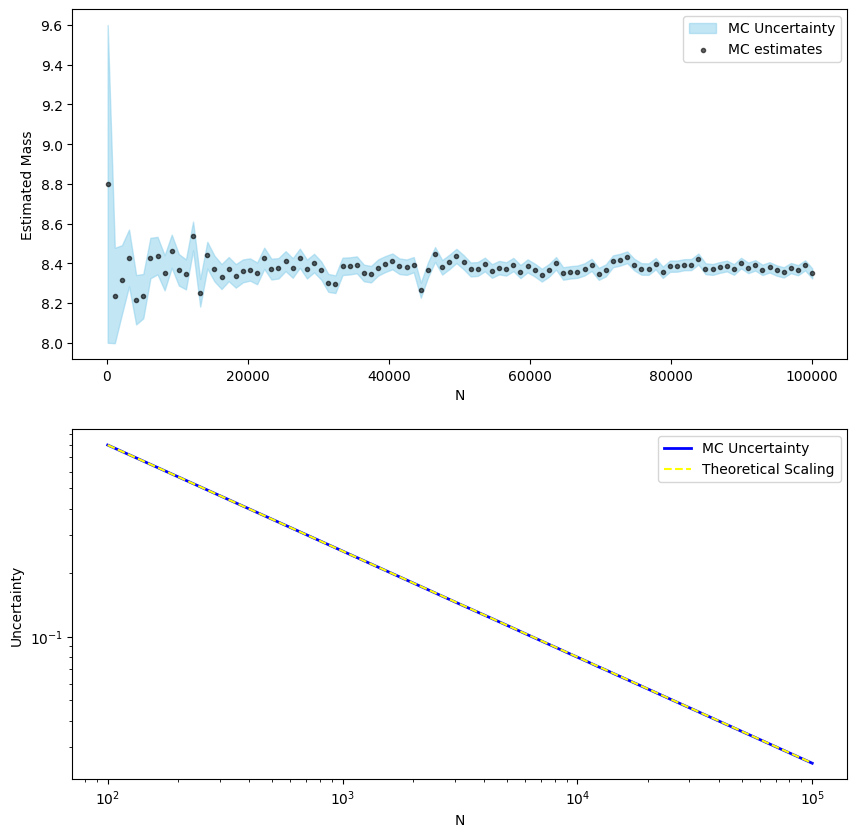


Final results (N=100000):
Mass: 8.3493 ± 0.0253
Relative error: 0.34%


In [4]:
# TODO: Convergence analysis implementation
# Create N_values array from 100 to 100,000

N_values = np.linspace(100, 100000, 100, dtype=int)
num = len(N_values)
masses = np.zeros(num)
uncertainties = np.zeros(num) # ndarray easier to work with than python list

# TODO: Loop over N values and collect mass estimates and uncertainties
for i, N in enumerate(N_values):
    mass_, uncertainty_ = integrate_MC(N)
    masses[i] = mass_
    uncertainties[i] = uncertainty_
    #print(f"m:\t{mass_}\tu:\t{uncertainty_}")

# TODO: Create 2 figure with two subplots: convergence plot and uncertainty scaling to 1/√N 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.fill_between(N_values, masses - uncertainties, masses + uncertainties, color='skyblue', alpha=0.5, label="MC Uncertainty")
ax1.scatter(N_values, masses, marker='.', color='k', alpha=0.6, label='MC estimates')
ax1.set_xlabel('N')
ax1.set_ylabel('Estimated Mass')
ax2.loglog(N_values, uncertainties, color='blue', linewidth=2, label='MC Uncertainty')
theoretical_scaling = uncertainties[0] * np.sqrt(N_values[0] / N_values)
ax2.loglog(N_values, theoretical_scaling,'--', color='yellow', label='Theoretical Scaling')
ax2.set_xlabel('N')
ax2.set_ylabel('Uncertainty')
ax1.legend()
ax2.legend()
plt.show()

# TODO: Print results

final_error = abs(masses[-1] - theoretical) / theoretical * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

## Part B: Linear Density (3 pt)

**Variable Density:** ρ(r) = ρ₀r where r = √(x² + y² + z²)

**Theory:** 
- Density increases with distance from center
- Analytical result: M = πρ₀ = 2π ≈ 6.283
- Same Monte Carlo method, different density function

**Requirements:**
- Implement `linear_density(x, y, z)` function  
- Find N needed for 1% accuracy you can use scaling 
- Compare with theoretical value

In [6]:
# TODO: Implement linear density function
# Calculate r = sqrt(x² + y² + z²), then return ρ₀ × r
def linear_density_func(pos):
    dist = 0
    for x in pos:
        dist += x ** 2 # distance from origin
    r = np.sqrt(dist)
    return 2.0 * r # ρ₀ = 2.0

# TODO: Find N for 1% accuracy
# Use scaling relationship: N_new = N_old × (σ_old / σ_target)²

theoretical = 2.0 * np.pi # theoretical value for mass
s_target = theoretical * 0.01 # target uncertainty
N_old = N_values[-1]
s_old = uncertainties[-1]
N_new = int(np.ceil(N_old * (s_old / s_target)**2)) # N must be an integer, round up for err <= 1%
    
# TODO: Calculate mass with linear density large N
# Compare with theoretical value

def calculate_mass_lin_density(pos_arr): # rinse and reuse!
    N = len(pos_arr) # pos_arr already generated with N rows
    V_cube = 8.0 # [-1, 1]^3
    # mass & uncertainty calc
    f = np.array([(linear_density_func(pos) * index_func(pos)) for pos in pos_arr])
    mass = V_cube / N * np.sum(f)
    unc = V_cube * np.std(f, ddof=1) / np.sqrt(N) # V_cube * (sigma / sqrt N)
    
    return mass, unc

# calculate mass and 
points = generate_random_points(N_new)
mass_1p, unc_1p = calculate_mass_lin_density(points)
actual_error = abs(mass_1p - theoretical) / theoretical * 100


print(f"\nFor 1% accuracy:")
print(f"Target uncertainty: {s_target:.4f}")
print(f"Required N: {N_new:.0f}")

print(f"Verification: mass = {mass_1p:.4f} ± {unc_1p:.4f}")
print(f"Actual error: {actual_error:.2f}%")


For 1% accuracy:
Target uncertainty: 0.0628
Required N: 16181
Verification: mass = 6.3561 ± 0.0504
Actual error: 1.16%


## Bonus 1: Exponential Density (1 pt)

Consider a density that is an unit exponential function of the radius according to $$\rho(r)=1/\rho_0 e^{-\rho_0 r}$$

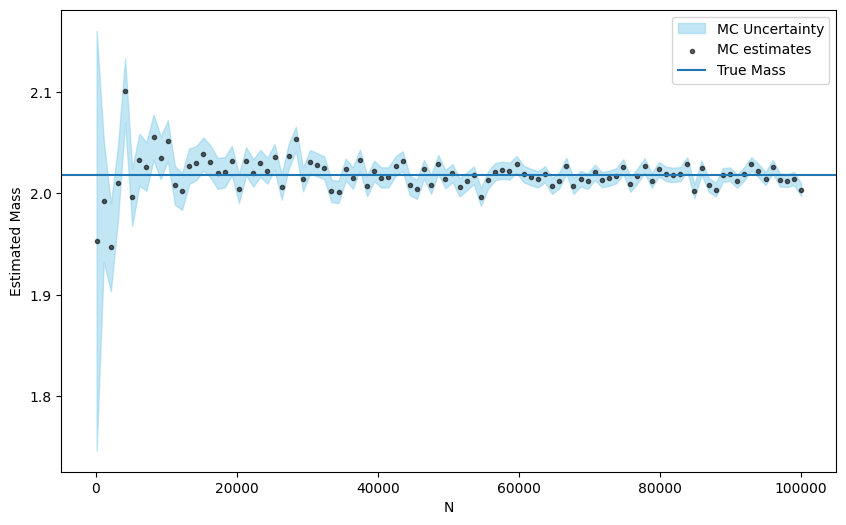


Final results (N=100000):
Mass: 2.0038 ± 0.0064
Relative error: 0.71%


In [12]:
# TODO: Implement exponential_density(x, y, z, rho0=1.0) returning exp(-rho0*r)/rho0
def exp_density(pos, rho_0=1.0):
    r = np.sqrt(np.sum([x**2 for x in pos]))
    rho = np.exp(-rho_0 * r) / rho_0
    return rho

# TODO: Calculate mass_exp and unc_exp using monte_carlo_integration with N
def calculate_mass_exp_density(pos_arr): # rinse and reuse!
    N = len(pos_arr) # pos_arr already generated with N rows
    V_cube = 8.0 # [-1, 1]^3
    # mass & uncertainty calc
    f = np.array([(exp_density(pos) * index_func(pos)) for pos in pos_arr])
    mass = V_cube / N * np.sum(f)
    unc = V_cube * np.std(f, ddof=1) / np.sqrt(N) # V_cube * (sigma / sqrt N)
    
    return mass, unc

# who up monteing they carlo?
def monte_carlo_exp(N):
    points = generate_random_points(N)
    mass_exp, unc_exp = calculate_mass_exp_density(points)
    return mass_exp, unc_exp

# TODO: Create convergence comparison plot vs N,  set theoretical value for comparison
N_values = np.linspace(100, 100000, 100, dtype=int)
num = len(N_values)
masses = np.zeros(num)
uncertainties = np.zeros(num) # ndarray easier to work with than python list
# Loop over N values and collect mass estimates and uncertainties
for i, N in enumerate(N_values):
    mass_, uncertainty_ = monte_carlo_exp(N)
    masses[i] = mass_
    uncertainties[i] = uncertainty_

theoretical_exp = 8.0 * np.pi * (1.0 - np.exp(-1.0) * 2.5)

# Convergence plot 
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.fill_between(N_values, masses - uncertainties, masses + uncertainties, color='skyblue', alpha=0.5, label="MC Uncertainty")
ax1.scatter(N_values, masses, marker='.', color='k', alpha=0.6, label='MC estimates')
ax1.set_xlabel('N')
ax1.set_ylabel('Estimated Mass')
ax1.axhline(theoretical_exp, label="True Mass") # theoretical value
ax1.legend()
plt.show()

# TODO: Print results

final_error = abs(masses[-1] - theoretical_exp) / theoretical_exp * 100
print(f"\nFinal results (N={N_values[-1]}):")
print(f"Mass: {masses[-1]:.4f} ± {uncertainties[-1]:.4f}")
print(f"Relative error: {final_error:.2f}%")

# Part II: Ising Model (4 pt)

**Statistical Mechanics Background:**

The **Ising model** is a mathematical model of ferromagnetism in statistical mechanics. It describes a system of discrete spins that can be in one of two states (+1 or -1) arranged on a lattice.

**Physical Motivation:**
- Models magnetic materials like iron
- Each lattice site represents an atomic magnetic moment
- Spins prefer to align with neighbors (ferromagnetic coupling)
- Temperature creates thermal fluctuations that oppose ordering
- Results in **phase transition** between ordered and disordered states

**Energy Function:**
$$H(S)=-\frac{J}{2}\sum_{i,j} s_{i,j} (s_{i+1,j}+s_{i-1,j}+s_{i,j+1}+s_{i,j-1})$$

Where:
- **J > 0**: Ferromagnetic coupling (favors parallel spins)
- **⟨i,j⟩**: Sum over nearest neighbors only
- **s_i ∈ {-1, +1}**: Spin values

Without loss of generizability, we choose a parameterization that $J=1$ and $k_B=1$.

**Key Physics:**
- **Low T**: Thermal energy << J → spins align → ordered (ferromagnetic) phase
- **High T**: Thermal energy >> J → spins random → disordered (paramagnetic) phase  
- **Critical temperature T_c**: Phase transition occurs
- **2D Ising exact result**: T_c = 2J/ln(1+√2) ≈ 2.269 (for J=1)

**Metropolis Algorithm:**
Uses Monte Carlo sampling to generate configurations according to Boltzmann distribution:
P(configuration) ∝ $e^{-\Delta E/T}$, with $T=1.5$.

**Algorithm Steps:**
1. Choose random spin
2. Calculate energy change ΔE if flipped  
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat many times to reach equilibrium


## Step 1: Initialize Lattice

**Lattice Setup:**
- 10×10 lattice with periodic boundaries (edges wrap around)
- Initial state: all spins = +1
- Each spin has exactly 4 neighbors

In [57]:
# TODO: Initialize 10x10 lattice with all spins = +1
# Use np.ones((L, L), dtype=int) for integer spins
L = 10
lat = np.ones((L,L), dtype=int)
# TODO: Test lattice creation and print shape and initial magnetization
# magnetization M is sum of magnetic moments (aka spin in this case)
M_init = np.sum(lat) / lat.size # magnetization = ave mag moment per spin
print(f"Lattice Shape:\t\t{lat.shape}")
print(f"Initial Magnetization:\t{M_init}")

Lattice Shape:		(10, 10)
Initial Magnetization:	1.0


## Step 2: Energy Calculation

**Energy Function:** E = -J Σ s_i s_j (sum over nearest neighbors)

**Key Points:**
- Parallel spins (+1,+1 or -1,-1): contribute -J (lower energy)
- Antiparallel spins (+1,-1): contribute +J (higher energy)  
- Use periodic boundaries: neighbors wrap around edges
- Avoid double-counting pairs

**Test if your energy function is correct:**

for a Test lattice (3x3):

[[1 1 1]
 [1 1 1]
 [1 1 1]]
 
Total energy: -18.0

In [17]:
# TODO: Calculate total energy from 4 neighbor coordinates (avoid double counting!)
# Count each pair once: only right and down neighbors
def total_energy(lat, J=1.0):
    L = lat.shape[0] # lat is (L x L)
    E = 0
    # double summation. only right and down to avoid double counting
    for i in range(L):
        right = (i + 1) % L # period BC. if i+1 out of bound, "wrap around"
        for j in range(L):
            down = (j + 1) % L # "wrap around" if j+1 out of bound
            s = lat[i, j]
            s_r = lat[(right), j] # spin of right neighbor
            s_d = lat[i, (down)] # spin of down neighbor
            E += -J * s * (s_r + s_d)
    return E

# TODO: Energy change if spin (i,j) flips
# ΔE = -2 × local_energy (since spin changes sign)
def energy_change(lat, i, j, J=1.0):
    L = lat.shape[0] # (L x L)
    s = lat[i, j]
    # neighbors
    right = (i+1) % L
    left = (i-1) % L
    up = (j-1) % L
    down = (j+1) % L
    s_r = lat[right, j]
    s_l = lat[left, j]
    s_u = lat[i, up]
    s_d = lat[i, down]
    local_energy = -J * s * (s_r + s_l + s_u + s_d)
    deltaE = -2.0 * local_energy
    return deltaE

# TODO: Test your energy function with small lattice and print results
test_lat = np.ones((3,3), dtype=int)
print(test_lat)
test_E = total_energy(test_lat)
print(f"Total energy of test lattice:\t{test_E}")

[[1 1 1]
 [1 1 1]
 [1 1 1]]
Total energy of test lattice:	-18.0


## Step 3: Metropolis Algorithm: Magnetization vs. N

Calculate the magnitization $$<M>=\frac{1}{N} \sum_{i,j\in\Lambda} s_{i,j}$$ as function of MC steps $N$. Plot $<M>$ as function of $N$ where $N$ starts from 0 to 10000 with step size $\Delta N=100$. Does the magnitization converge to an equillibrium value?

**Algorithm:**
1. Choose random spin
2. Calculate energy change ΔE if flipped
3. Accept flip with probability min(1, exp(-ΔE/T))
4. Repeat for N times

**Important Grading requirement:**
> **💡 Note:** This MC algorithm is partially given, but you need to explain what each line stands for.


In [23]:
# TODO: Implement Metropolis algorithm

# TODO: Monte Carlo sweep (L² attempts) using Metropolis algorithm 
# Perform L² individual spin flip attempts, return updated configuration

def MCmove(config, T):
    L = config.shape[0] # config is a (L, L) lattice
    for i in range(L):
        for j in range(L):
                # choose random spins
                a = np.random.randint(0, L)
                b = np.random.randint(0, L)
                spin =  config[a, b]
                # 4 neighbors - right, left, up, down
                neighbors = config[(a+1)%L,b]+config[(a-1)%L,b]+config[a,(b-1)%L]+config[a,(b+1)%L]
                delE = 2*spin*neighbors # delE = -2*local_E where local_E is -J*spin*neighbors. J=1 in our case.
                # to flip or not to flip...
                if delE < 0:
                    spin *= -1 
                elif np.random.rand() < np.exp(-delE/T): # random thermal fluctuation with p = exp(-delE/T). rand() is a random var in [0,1]
                    spin *= -1 
                config[a, b] = spin
    return config

In [60]:
# TODO: Full simulation with observable measurement
# Run multiple sweeps (MC steps), sample magnetization and energy every few sweeps
T = 1.5
#N_vals = np.arange(0, 10001, 100, dtype=int) # endpoint excluded. gives 0 to 10000 w step size 100.
N_max = 10000
step = 100
n = int((N_max / step)) # number of checkpoints in the for loop below. excluding 0
M_N = np.zeros(n) # M as a function of N to be stored
N_vals = np.ones(n, dtype=int) # N to be stored
cumulat = np.zeros((L,L)) # accumulated lattice over N
for i in range(N_max):
    N = i + 1
    # do mc
    lat = MCmove(lat, T)
    cumulat += lat
    # every dN = 100, calculate M
    if N == 1:
        M_N[0] = np.sum(lat) / lat.size
        N_vals[0] = N
    if N % step == 0:
        M_N[i//step] = np.sum(cumulat) / (N*lat.size)
        N_vals[i//step] = N

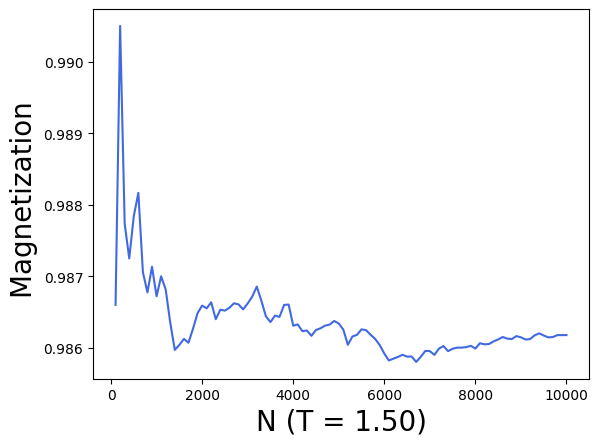

In [61]:
# TODO:Plot average Magnetization as function of N (number of MC steps)
plt.plot(N_vals, M_N, color='RoyalBlue')
plt.xlabel('N (T = {:.2f})'.format(T), fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20); 

Looks like random walk! (Probably is, since it's thermal fluctuation)

## Bonus 2: Temperature Study (4 pt)

**Goal:** Observe ferromagnetic phase transition in physics observables around T_critical= 2.0 / np.log(1 + np.sqrt(2))


**Method:**
- Study temperatures $T$ from 1.5 to 3.25 with 10 steps.
- For each T: equilibrate with 10000 MC sampling → measure → record averages 
- Plot Magnetization, Energy, Susceptibility, Heat capacity vs. temperature

**Expected:** 
- Low T: high |m|, low energy (ordered)
- High T: low |m|, high energy (disordered)
- Transition around T_c = 2.269

**Observable Quantities:**
- **Magnetization**: $\langle m \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} M_i$ (order parameter) - measures degree of spin alignment
- **Energy**: $\langle e \rangle = \frac{1}{N_{steps}} \sum_{i=1}^{N_{steps}} E_i$ (average energy per spin) - indicates thermal state of the system
- **Susceptibility**: $\chi = \frac{1}{k_B T}(\langle M^2 \rangle - \langle M \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} M_i\right)^2\right)$ - measures response to external magnetic field, peaks at phase transition
- **Heat capacity**: $C = \frac{1}{k_B T}(\langle E^2 \rangle - \langle E \rangle^2) = \frac{1}{T}\left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i^2 - \left(\frac{1}{N_{steps}}\sum_{i=1}^{N_{steps}} E_i\right)^2\right)$ - quantifies energy fluctuations, shows anomaly at critical temperature

*Note that we have chosen $k_B=1$ for this exercise*

In [ ]:
# TODO: Scan temperatures from 1.5 to 3.25 with 10 steps
# Loop over temperatures: equilibrate, measure, record averages

# TODO: Create 4 plots: magnetization vs T, energy vs T, Susceptibility vs T, Specifc Heat vs T
# Add vertical line at theoretical T_c 

# TODO: Print relative difference between empirical and theoretical T_c
# print(f"Relative difference: {abs(T_empirical - T_critical)/T_critical * 100:.1f}%")

# Discussion

**Answer the following questions based on your results:**

## Part I: MC Integration

1. What was your theoretical mass for uniform density and linear density (and exponential density if you did bonus)?

Theoretical mass for uniform density was 8.378, and for linear density it was 6.283. For exponential density it was 2.019.
   
2. How fast did MC integration converge to $1\%$ error for each density distribution?

The only calculation asked for 1% error was for the linear density, and the required N was at ~ 16000. Compared to the range of N values we've tried (max N = 100,000), I would say that is pretty fast.

3. Does the uncertainty scale as expected?

Based on the uncertainty scaling plot we made for the uniform density part, as well as 'eyeballing' the uncertainty regions filled in convergence plots, I would say yes.

## Part II: Ising Model  
1. What critical temperature did you observe? Compare your T_c with theoretical value (2.269).

...I did not do the bonus part so I can't answer this! :(